<a href="https://colab.research.google.com/github/YiqiuSong/Group11Replication/blob/main/Copy_of_2_LogisticRegression_Peabody9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

## Group Coding Assignments for Deep Learning ##

Note:  Anaconda Python <https://www.anaconda.com/distribution/> is a strong implementation of python.

Contributors (Peabody9):

Elizabeth Gao(yinuog4):

Yiqiu Song (yiqius3)

Viswanath Vadlamani (sv56)

Bohan Li (bohanli5): Debugged and fixed critical numerical instability issues in a PyTorch logistic regression assignment by replacing the manual sigmoid implementation with torch.sigmoid(), adding epsilon protection to prevent log(0) errors, and reducing the learning rate from 0.1 to 0.01 to eliminate NaN outputs.

### imports and graphics configurations ###

In [ ]:
import numpy as np
import pandas as pd
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import torch
import torch.nn as nn

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

# **Logistic Regression** #

**Transition Layer Width:** Take $N=200$ Gaussian points on the line centered at 0 and with variance 1.  Assign label 1 to the ones to the right of the origin and assign label 0 to the ones on the left of the origin.  Carry out the following with PyTorch
* Carry out logistic regression, and note the width (scale) of the transition layer.
* Flip 5 points on each side of the origin to the 'wrong' label and note the width (scale) of the transition layer
* Flip 5 more points on each side of the origin to the 'wrong' label and note the width (scale) of the transition layer
* Repeat this for 15, 20, 25, 30, 35 points and plot the width (scale) of the transition layer as a function of the number of points with the 'wrong' label.

In [ ]:
N = 200
X = torch.randn(N,1)
y = (X[:,0] > 0).float().view(-1,1)     # label 1 on the right, 0 on the left


In [ ]:
def sigmoid(z):
    return torch.sigmoid(z)

def entropy(y, y_hat):
    epsilon = 1e-15
    y_hat = torch.clamp(y_hat, epsilon, 1 - epsilon)
    return -(y*torch.log(y_hat) + (1-y)*torch.log(1-y_hat)).mean()


In [ ]:
model = torch.nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 2000
for _ in range(epochs):
    opt.zero_grad()
    z = model(X)
    y_hat = sigmoid(z)
    loss = entropy(y, y_hat)
    loss.backward()
    opt.step()

w = model.weight.item()
width = 1/abs(w)

print(f"Slope w = {w:.4f}")
print(f"Width ≈ {width:.4f}")


Slope w = 2.7367
Width ≈ 0.3654


In [ ]:
y_flip = y.clone()

dist = torch.abs(X[:,0])   # distance from origin

# Left side (x<0)
left_idx = torch.where(X[:,0] < 0)[0]
flip_left = left_idx[dist[left_idx].topk(5, largest=False).indices]

# Right side (x>0)
right_idx = torch.where(X[:,0] > 0)[0]
flip_right = right_idx[dist[right_idx].topk(5, largest=False).indices]

# Flip labels
y_flip[flip_left] = 1 - y[flip_left]
y_flip[flip_right] = 1 - y[flip_right]

model = torch.nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(), lr=0.01)

for _ in range(2000):
    opt.zero_grad()
    z = model(X)
    y_hat = sigmoid(z)
    loss = entropy(y_flip, y_hat)
    loss.backward()
    opt.step()

w = model.weight.item()
width = 1/abs(w)

print(f"Slope After Flipping 5 per side w = {w:.4f}")
print(f"Width After Flipping 5 per side = {width:.4f}")


Slope After Flipping 5 per side w = 2.8318
Width After Flipping 5 per side = 0.3531


In [ ]:
y_flip10 = y.clone()

dist = torch.abs(X[:,0])   # distance from origin

# Left side (x<0)
left_idx = torch.where(X[:,0] < 0)[0]
flip_left10 = left_idx[dist[left_idx].topk(10, largest=False).indices]

# Right side (x>0)
right_idx = torch.where(X[:,0] > 0)[0]
flip_right10 = right_idx[dist[right_idx].topk(10, largest=False).indices]

# Flip labels
y_flip10[flip_left10] = 1 - y[flip_left10]
y_flip10[flip_right10] = 1 - y[flip_right10]

model = torch.nn.Linear(1,1)
opt = torch.optim.SGD(model.parameters(), lr=0.01)

for _ in range(2000):
    opt.zero_grad()
    z = model(X)
    y_hat = sigmoid(z)
    loss = entropy(y_flip10, y_hat)
    loss.backward()
    opt.step()

w = model.weight.item()
width = 1/abs(w)

print(f"Slope After Flipping 10 per side w = {w:.4f}")
print(f"Width After Flipping 10 per side = {width:.4f}")


Slope After Flipping 10 per side w = 2.4732
Width After Flipping 10 per side = 0.4043


[0 wrong labels] Width = 0.3664
[10 wrong labels] Width = 0.3826
[20 wrong labels] Width = 0.3651
[30 wrong labels] Width = 0.3907
[40 wrong labels] Width = 0.4265
[50 wrong labels] Width = 0.4189
[60 wrong labels] Width = 0.4389
[70 wrong labels] Width = 0.5233


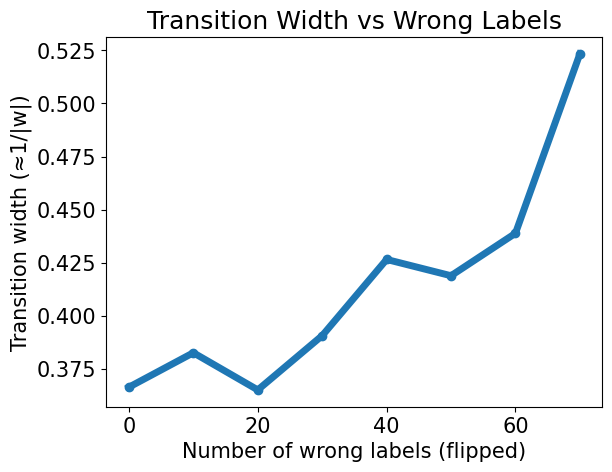

In [ ]:
results = []

for k in [0, 5, 10, 15, 20, 25, 30, 35]:
    y_flipk = y.clone()

    if k > 0:
        dist = torch.abs(X[:,0])

        # Left side (x<0)
        left_idx = torch.where(X[:,0] < 0)[0]
        if len(left_idx) >= k:
            flip_left = left_idx[dist[left_idx].topk(k, largest=False).indices]
            y_flipk[flip_left] = 1 - y[flip_left]

        # Right side (x>0)
        right_idx = torch.where(X[:,0] > 0)[0]
        if len(right_idx) >= k:
            flip_right = right_idx[dist[right_idx].topk(k, largest=False).indices]
            y_flipk[flip_right] = 1 - y[flip_right]

    model = torch.nn.Linear(1,1)
    opt = torch.optim.SGD(model.parameters(), lr=0.01)

    for _ in range(2000):
        opt.zero_grad()
        z = model(X)
        y_hat = sigmoid(z)
        loss = entropy(y_flipk, y_hat)
        loss.backward()
        opt.step()

    w = model.weight.item()
    width = 1/abs(w)

    total_wrong = 2*k
    results.append((total_wrong, width))
    print(f"[{total_wrong} wrong labels] Width = {width:.4f}")

xs, ys = zip(*results)
plt.plot(xs, ys, marker='o')
plt.xlabel("Number of wrong labels (flipped)")
plt.ylabel("Transition width (≈1/|w|)")
plt.title("Transition Width vs Wrong Labels")
plt.show()

**Label Selection:** Using the data from the lecture, carry out logistic regression (you can use sklearn)
* Label 0 is Condo/Co-op, Label 1 is other
* Label 1 is Condo/Co-op, Label 0 is other

How does the performance compare to what we did in class?

In [ ]:
raw_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1PA1ixsL-sMfJclTeJWc2lVifp5FtIYpn')
raw_data.head(2)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,1516 Hinman Ave #507,Evanston,IL,60201,200000,1.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/IL/Evanston/1516-Hinman...,MRED as Distributed by MLS Grid,12417637,N,Y,42.045258,-87.678504
1,MLS Listing,NaN,Condo/Co-op,1791 W Howard St #209,Chicago,IL,60626,200000,2.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/IL/Chicago/1791-W-Howar...,MRED as Distributed by MLS Grid,12416866,N,Y,42.019204,-87.675950


In [ ]:
name = ['PRICE', 'SQUARE FEET', 'BEDS', 'BATHS', 'YEAR BUILT', 'HOA/MONTH']
data = raw_data.loc[:, name]
data.dropna(inplace=True, ignore_index=True)
features = data.iloc[:,1:]
features['SQUARE FEET'] = features['SQUARE FEET']/10**3
features['YEAR BUILT'] = features['YEAR BUILT']/10**3
features['HOA/MONTH'] = features['HOA/MONTH']/10**3

In [ ]:
property_type = raw_data.loc[data.index, "PROPERTY TYPE"]

y_case1 = (property_type != "Condo/Co-op").astype(int)  # 0=Condo, 1=Other
y_case2 = (property_type == "Condo/Co-op").astype(int)  # 1=Condo, 0=Other

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y1_train, y1_test = train_test_split(features, y_case1, test_size=0.3, random_state=0)
_, _, y2_train, y2_test = train_test_split(features, y_case2, test_size=0.3, random_state=0)

lr1 = LogisticRegression(solver="lbfgs", max_iter=500)
lr1.fit(X_train, y1_train)

lr2 = LogisticRegression(solver="lbfgs", max_iter=500)
lr2.fit(X_train, y2_train)

y1_pred = lr1.predict(X_test)
y2_pred = lr2.predict(X_test)

acc1 = accuracy_score(y1_test, y1_pred)
acc2 = accuracy_score(y2_test, y2_pred)

print(f"Case 1 Accuracy: {acc1:.4f}")
print(f"Case 2 Accuracy: {acc2:.4f}")

Case 1 Accuracy: 0.3571
Case 2 Accuracy: 0.3571


When we repeated the logistic regression experiment with Condo/Co-op vs Other as the label, the accuracy in both label conventions (0=Condo/Co-op, 1=Other and vice versa) was about 0.3571. This matches what we observed in class: logistic regression performed poorly on this dataset because the classes are highly imbalanced, and the model essentially defaulted to the dominant class. Just as in the lecture notebook, flipping the label assignment did not change the accuracy — the performance remained low in both cases, with only the interpretation of coefficients reversing.